In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [14]:
data = pd.read_csv('dog_rates_tweets.csv')
rating_regex = r'(\d+(\.\d+)?)/10'
data['rating'] = data['text'].str.extract(rating_regex)[0].astype(float)

In [15]:
data_with_ratings = data[data['rating'].notnull()]
data_cleaned = data_with_ratings[data_with_ratings['rating'] <= 25]


data_cleaned['created_at'] = pd.to_datetime(data_cleaned['created_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

data_cleaned = data_cleaned[data_cleaned['created_at'].notnull()]

data_cleaned['timestamp'] = data_cleaned['created_at'].apply(lambda x: x.timestamp())

/var/folders/l6/fhx_0l9x4qx5dg522md25gl40000gn/T/ipykernel_16953/3595017047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['created_at'] = pd.to_datetime(data_cleaned['created_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


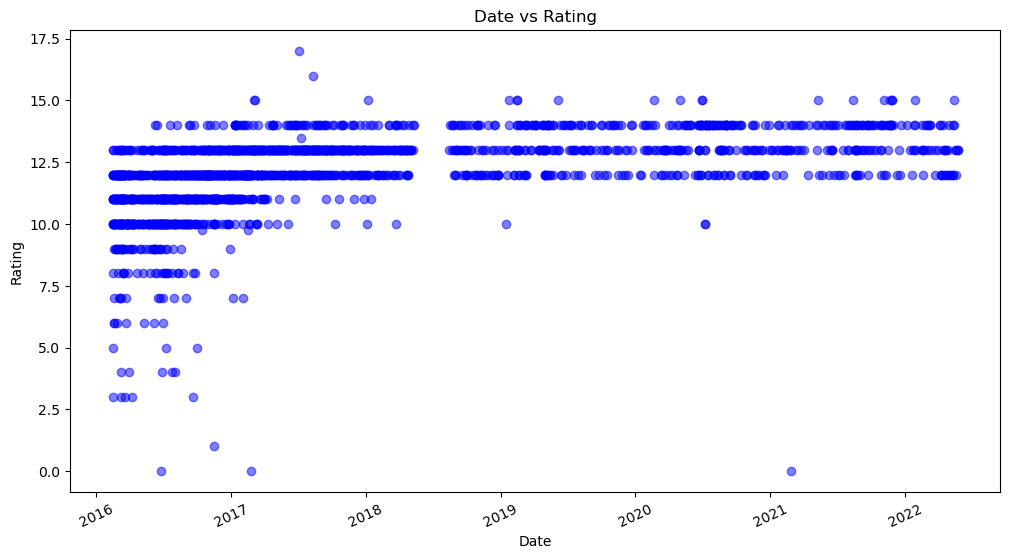

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['created_at'], data_cleaned['rating'], color='b', alpha=0.5)
plt.xticks(rotation=25)
plt.title('Date vs Rating')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()


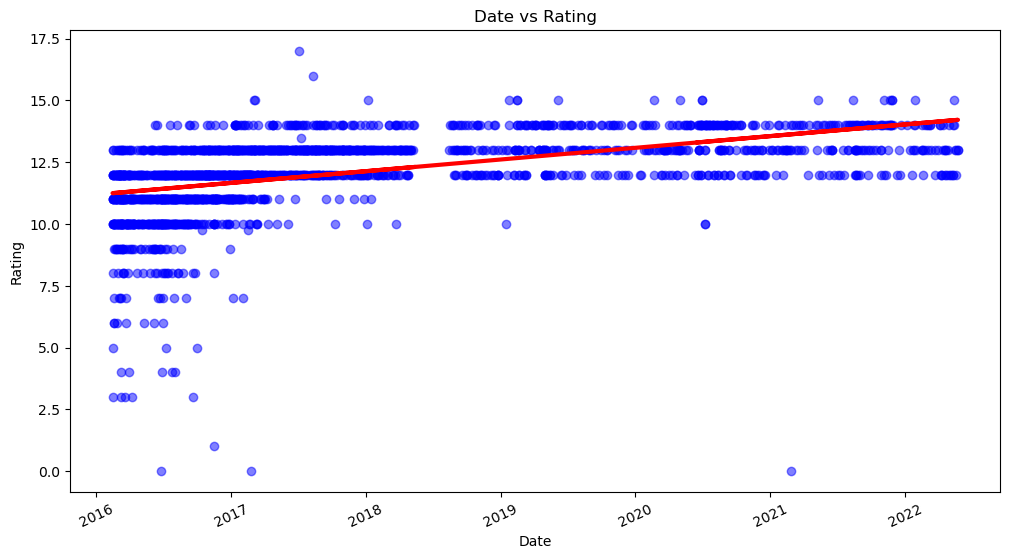

Slope: 1.5002953343735724e-08
Intercept: -10.59001653360649
P-value: 2.536058725135737e-127


In [17]:
fit = stats.linregress(data_cleaned['timestamp'], data_cleaned['rating'])
slope = fit.slope
intercept = fit.intercept
p_value = fit.pvalue

plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['created_at'], data_cleaned['rating'], color='b', alpha=0.5)
plt.plot(data_cleaned['created_at'], data_cleaned['timestamp']*slope + intercept, 'r-', linewidth=3)
plt.xticks(rotation=25)
plt.title('Date vs Rating')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("P-value:", p_value)

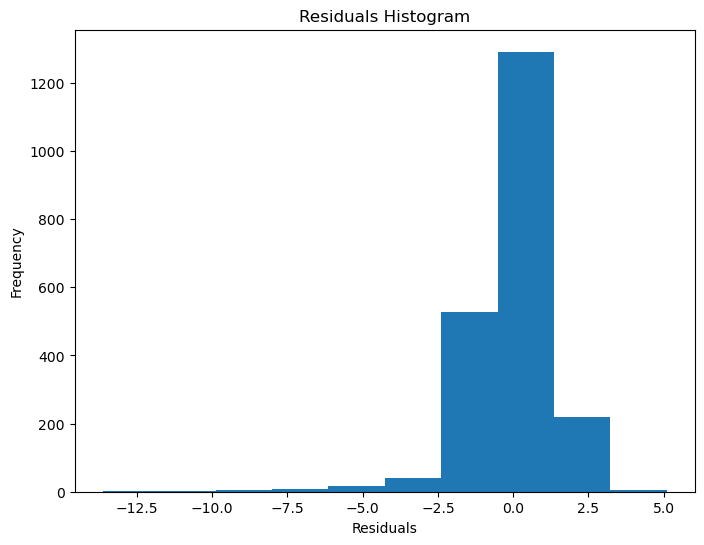

In [18]:
predicted_ratings = data_cleaned['timestamp']*slope + intercept
residuals = data_cleaned['rating'] - predicted_ratings


plt.figure(figsize=(8, 6))
plt.hist(residuals)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()